***Training Loop***

In [13]:
import sys, os
sys.path.append(os.path.abspath(".."))
import numpy as np
import matplotlib.pyplot as plt
from src.model import LogisticRegression

In [14]:
# Create synthitic data
np.random.seed(42)
n_samples = 100
class_0_mean = [0, 0]
class_1_mean = [2, 2]
std = 0.5
blob_0 = np.random.normal(class_0_mean, std, size=(n_samples, 2))
y0 = np.zeros((n_samples, 1))
blob_1 = np.random.normal(class_1_mean, std, size=(n_samples, 2))
y1 = np.ones((n_samples, 1))

# Combine
X = np.vstack([blob_0, blob_1])
y = np.vstack([y0, y1])

indices = np.random.permutation(len(X))

X = X[indices]
y= y[indices]

print(f"X: {X.shape} y: {y.shape}")

X: (200, 2) y: (200, 1)


In [ ]:
model = LogisticRegression(n_features=2, lr=0.01, l2=0.0001)
print(f"Weights: {model.weights} Bias: {model.bias} L2: {model.l2}")

Weights: [[-0.65064257]
 [-0.48712538]] Bias: 0 L2: 0.001


In [16]:
losses = []
epochs = 50
for epoch in range(epochs):
    z, y_hat = model.forward(X)
    loss = model.loss(y, y_hat)
    dW, dB = model.backward(X, y, y_hat)
    model.update(dW, dB)
    losses.append(loss)
    print(f"Epoch: {epoch} | Loss: {loss}")


Epoch: 0 | Loss: 1.5762626807416786
Epoch: 1 | Loss: 0.48785954911434787
Epoch: 2 | Loss: 0.34229353358929715
Epoch: 3 | Loss: 0.2536901064210534
Epoch: 4 | Loss: 0.20038246306267615
Epoch: 5 | Loss: 0.16763072072058957
Epoch: 6 | Loss: 0.14631076860335845
Epoch: 7 | Loss: 0.13126370810352395
Epoch: 8 | Loss: 0.11982028370866
Epoch: 9 | Loss: 0.11064427711256666
Epoch: 10 | Loss: 0.10303325757096127
Epoch: 11 | Loss: 0.09657896874169308
Epoch: 12 | Loss: 0.09101880125514886
Epoch: 13 | Loss: 0.08617042751249222
Epoch: 14 | Loss: 0.08190060040388383
Epoch: 15 | Loss: 0.07810853649152755
Epoch: 16 | Loss: 0.07471612474434837
Epoch: 17 | Loss: 0.07166169118082476
Epoch: 18 | Loss: 0.06889580287688662
Epoch: 19 | Loss: 0.0663783322846401
Epoch: 20 | Loss: 0.06407634400737386
Epoch: 21 | Loss: 0.06196253988575878
Epoch: 22 | Loss: 0.06001409438610551
Epoch: 23 | Loss: 0.05821176915027167
Epoch: 24 | Loss: 0.05653923096330032
Epoch: 25 | Loss: 0.054982520293674064
Epoch: 26 | Loss: 0.0535296

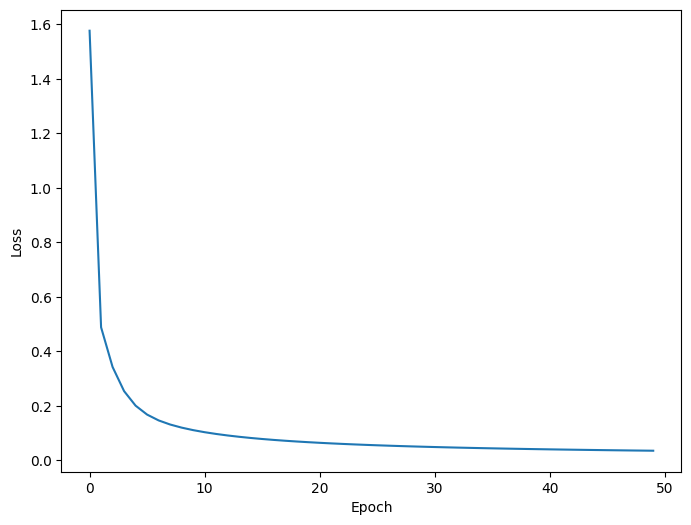

In [17]:
# Plot loss 

plt.figure(figsize=(8, 6))
plt.plot([i for i in range(epochs)], losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


In [18]:
# Measure accuracy

_ , y_hat = model.forward(X)

y_pred = (y_hat >= 0.5).astype(int)

accuracy = (y_pred == y).mean()
print(f"Accuracy: {accuracy}")

Accuracy: 1.0
